In [1]:
import sys
import os
sys.path.append('..')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

import utilities.functions as functions
from utilities.functions import (
    retidos,
    calcula_viabilidade,
    analisar_retencao,
)

In [2]:
import os
import os
os.getcwd()
os.listdir("dados")
import os
os.listdir("dados/gold")


['publico_janeiro_dezembro.parquet',
 'df_decil.parquet',
 'df_pub_un.parquet',
 'decil_dictionary.json']

In [3]:
publico_janeiro_dezembro = pd.read_parquet("dados/gold/publico_janeiro_dezembro.parquet")



In [4]:
publico_janeiro_dezembro.head(10)

,customer_id,origin_platform,is_target,order_created_month,num_pedidos_mes,num_pedidos_hist,total_amount_mes,ticket_medio
0,000126c9dafa16428eecae458c64435c8e894d24c48dec...,ANDROID,target,12,1,2,17.9,17.900000
1,000126c9dafa16428eecae458c64435c8e894d24c48dec...,ANDROID,target,1,1,2,17.9,17.900000
2,0001226e5175177581c0e520732ba58a61dfa96d57be0c...,ANDROID,target,12,2,4,86.5,43.250000
3,0001226e5175177581c0e520732ba58a61dfa96d57be0c...,ANDROID,target,1,2,4,86.5,43.250000
4,000116a7bc0a1da0c86ba2dddc02fcc70d35f8b900d693...,IOS,target,12,2,9,42.9,21.450000
5,000116a7bc0a1da0c86ba2dddc02fcc70d35f8b900d693...,IOS,target,1,7,9,187.0,26.714286
6,00010e03ea7d7c392a9b6cabcbed034e64fb54214e90bf...,ANDROID,target,12,4,11,66.9,16.725000
7,00010e03ea7d7c392a9b6cabcbed034e64fb54214e90bf...,ANDROID,target,1,7,11,135.1,19.300000
8,00010814ab1e602ccbc9ffe3b64f44973491b2fd6d8ab7...,ANDROID,control,12,2,4,114.0,57.000000
9,00010814ab1e602ccbc9ffe3b64f44973491b2fd6d8ab7...,DESKTOP,control,12,2,4,114.0,57.000000


Calculando retencao considerando dois ou + pedidos

In [5]:
df_1,clientes_retidos_1=retidos(publico_janeiro_dezembro, mes0=12, mes1=1,pedidos=1)
print(clientes_retidos_1)

           retidos  base  taxa_retencao
is_target                              
control          4     5       0.800000
target           5     6       0.833333


In [6]:
retencao_pedido_1=analisar_retencao(df_1)
retencao_pedido_1

{'target_retencao': 0.833333,
 'control_retencao': 0.8,
 'lift_absoluto': 0.033333,
 'lift_relativo_percent': 4.17,
 'target_success': 5,
 'target_total': 6,
 'control_success': 4,
 'control_total': 5,
 'z_stat': 0.142725,
 'p_value': 0.8865075246,
 'significativo': False}

Calculando retencao considerando tres ou + pedidos

In [7]:
df_2,clientes_retidos_2=retidos(publico_janeiro_dezembro, mes0=12, mes1=1,pedidos=2)
print(clientes_retidos_2)

           retidos  base  taxa_retencao
is_target                              
control          2     5            0.4
target           3     6            0.5


In [8]:
retencao_pedido_2=analisar_retencao(df_2)
retencao_pedido_2

{'target_retencao': 0.5,
 'control_retencao': 0.4,
 'lift_absoluto': 0.1,
 'lift_relativo_percent': 25.0,
 'target_success': 3,
 'target_total': 6,
 'control_success': 2,
 'control_total': 5,
 'z_stat': 0.331662,
 'p_value': 0.7401441358,
 'significativo': False}

Viabilidade 

In [9]:
resultados, agg = calcula_viabilidade(
    publico_janeiro_dezembro,
    mes_campanha=12,
    mes_seguinte=1,
    coupon_value=10.0,   
    margin_rate=0.12     
)

resultados


{'pedidos_por_cliente_dec_control': 6.2,
 'pedidos_por_cliente_dec_target': 2.1666666666666665,
 'pedidos_por_cliente_jan_control': 12.2,
 'pedidos_por_cliente_jan_target': 3.6666666666666665,
 'inc_pedidos_dec': -24.2,
 'inc_pedidos_jan': -51.2,
 'inc_pedidos_total': -75.4,
 'inc_gmv_dec': -1591.7819999999997,
 'inc_gmv_jan': -2691.8020000000006,
 'inc_gmv_total': -4283.584000000001,
 'margem_incremental': -514.0300800000001,
 'base_target_dec': 6,
 'custo_campanha': 60.0,
 'lucro_incremental': -574.0300800000001,
 'roi': -9.567168000000002,
 'coupon_value': 10.0,
 'margin_rate': 0.12}

Calculando retencao separadamente para outliers

In [10]:
orderns_de=publico_janeiro_dezembro[publico_janeiro_dezembro['order_created_month']==12]

In [11]:
distance = 1.5 * (np.nanpercentile(orderns_de['total_amount_mes'], 75) - np.nanpercentile(orderns_de['total_amount_mes'], 25))
lim_sup=distance + np.nanpercentile(orderns_de['total_amount_mes'], 75)

<Axes: >

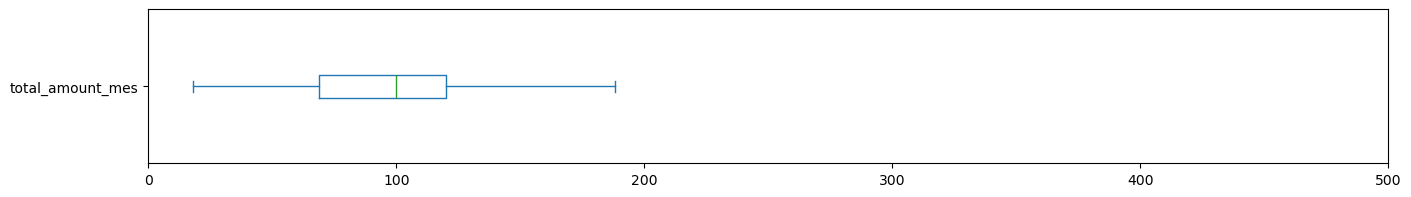

In [12]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
orderns_de['total_amount_mes'].plot(kind='box', xlim=(0, 500), vert=False, flierprops=red_square, figsize=(16,2))

In [13]:
orderns_de['total_amount_mes'].describe().round(2)

count     13.00
mean     158.84
std      169.13
min       17.90
25%       68.65
50%      100.00
75%      119.90
max      528.56
Name: total_amount_mes, dtype: float64

In [14]:
pb_drop_dj = publico_janeiro_dezembro.drop(
    publico_janeiro_dezembro[
        (publico_janeiro_dezembro['total_amount_mes'] == 0) |
        (publico_janeiro_dezembro['total_amount_mes'] > lim_sup)
    ].index,
    axis=0
)

In [15]:
pb_drop_dj

,customer_id,origin_platform,is_target,order_created_month,num_pedidos_mes,num_pedidos_hist,total_amount_mes,ticket_medio
0,000126c9dafa16428eecae458c64435c8e894d24c48dec...,ANDROID,target,12,1,2,17.90,17.900000
1,000126c9dafa16428eecae458c64435c8e894d24c48dec...,ANDROID,target,1,1,2,17.90,17.900000
2,0001226e5175177581c0e520732ba58a61dfa96d57be0c...,ANDROID,target,12,2,4,86.50,43.250000
3,0001226e5175177581c0e520732ba58a61dfa96d57be0c...,ANDROID,target,1,2,4,86.50,43.250000
4,000116a7bc0a1da0c86ba2dddc02fcc70d35f8b900d693...,IOS,target,12,2,9,42.90,21.450000
5,000116a7bc0a1da0c86ba2dddc02fcc70d35f8b900d693...,IOS,target,1,7,9,187.00,26.714286
6,00010e03ea7d7c392a9b6cabcbed034e64fb54214e90bf...,ANDROID,target,12,4,11,66.90,16.725000
7,00010e03ea7d7c392a9b6cabcbed034e64fb54214e90bf...,ANDROID,target,1,7,11,135.10,19.300000
8,00010814ab1e602ccbc9ffe3b64f44973491b2fd6d8ab7...,ANDROID,control,12,2,4,114.00,57.000000
9,00010814ab1e602ccbc9ffe3b64f44973491b2fd6d8ab7...,DESKTOP,control,12,2,4,114.00,57.000000


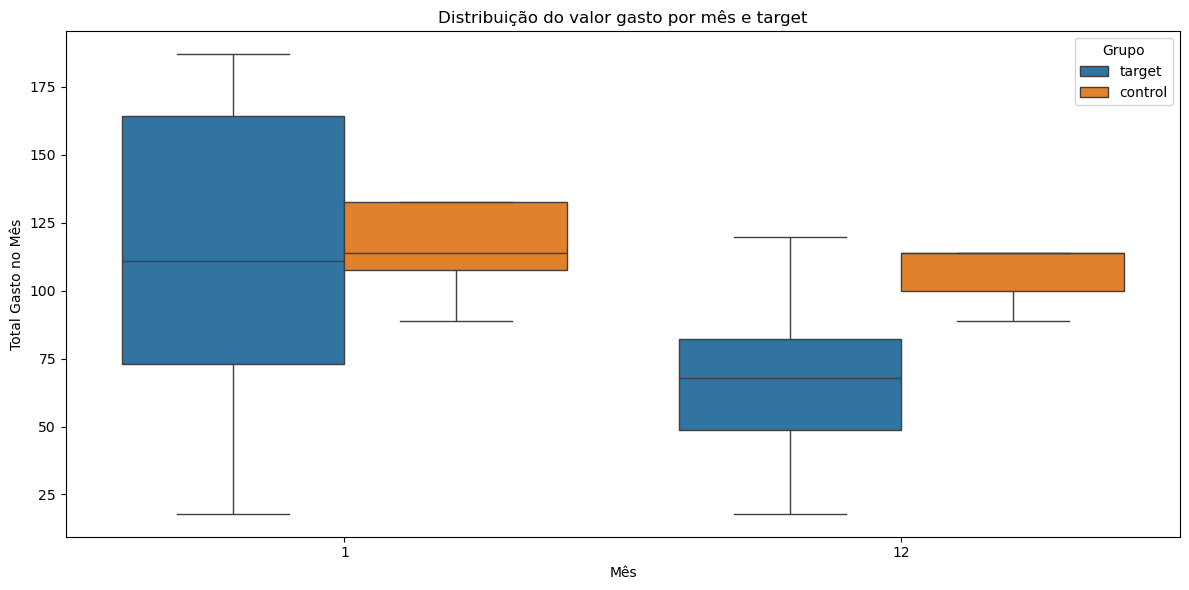

In [16]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=pb_drop_dj,
    x='order_created_month',               
    y='total_amount_mes',   
    hue='is_target',           
    showfliers=False          
)

plt.title('Distribuição do valor gasto por mês e target')
plt.xlabel('Mês')
plt.ylabel('Total Gasto no Mês')
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

In [17]:
pb_drop_dj_1,clientes_retidos_1=retidos(pb_drop_dj, mes0=12, mes1=1,pedidos=1)
print(clientes_retidos_1)

           retidos  base  taxa_retencao
is_target                              
control          2     4       0.500000
target           5     6       0.833333


In [18]:
pb_drop_dj_s=analisar_retencao(pb_drop_dj_1)
pb_drop_dj_s

{'target_retencao': 0.833333,
 'control_retencao': 0.5,
 'lift_absoluto': 0.333333,
 'lift_relativo_percent': 66.67,
 'target_success': 5,
 'target_total': 6,
 'control_success': 2,
 'control_total': 4,
 'z_stat': 1.126872,
 'p_value': 0.2597964597,
 'significativo': False}

In [19]:
resultados_out, agg_out = calcula_viabilidade(
    pb_drop_dj,
    mes_campanha=12,
    mes_seguinte=1,
    coupon_value=10.0,   
    margin_rate=0.12     
)

resultados_out


{'pedidos_por_cliente_dec_control': 2.25,
 'pedidos_por_cliente_dec_target': 2.1666666666666665,
 'pedidos_por_cliente_jan_control': 2.3333333333333335,
 'pedidos_por_cliente_jan_target': 3.6666666666666665,
 'inc_pedidos_dec': -0.5000000000000009,
 'inc_pedidos_jan': 7.999999999999998,
 'inc_pedidos_total': 7.499999999999997,
 'inc_gmv_dec': -504.735,
 'inc_gmv_jan': -340.9300000000001,
 'inc_gmv_total': -845.6650000000002,
 'margem_incremental': -101.47980000000003,
 'base_target_dec': 6,
 'custo_campanha': 60.0,
 'lucro_incremental': -161.4798,
 'roi': -2.6913300000000002,
 'coupon_value': 10.0,
 'margin_rate': 0.12}